### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [3]:
# load .csv file and list first 5 rows
data = pd.read_csv("../data/homework_dataset.csv")
data.head()

,homework_id,subject,topic,difficulty_1to5,description_sv,due_date,max_points,teacher_name,created_at,steps_count,steps_completeness,reasoning_quality,method_appropriateness,explanation_clarity
0,1,Matematik,Algebra,4,Beräkna värdet av uttrycket 3x² + 2x − 5 när x...,2025-10-12,6,Mats Svensson,2025-09-29,12,0.978,0.921,0.797,0.992
1,2,Matematik,Algebra,2,Beräkna värdet av uttrycket 3x² + 2x − 5 när x...,2025-10-09,5,Maria Holm,2025-09-22,3,0.735,0.606,0.537,0.686
2,3,Matematik,Algebra,2,Beräkna värdet av uttrycket 3x² + 2x − 5 när x...,2025-11-22,7,Karin Bergström,2025-11-04,5,0.634,0.589,0.811,0.627
3,4,Matematik,Algebra,2,Lös ekvationen 4(x − 2) = 8 och förklara varje...,2025-11-23,8,Peter Lindgren,2025-11-11,5,0.895,0.605,0.991,0.838
4,5,Matematik,Algebra,1,Beräkna värdet av uttrycket 3x² + 2x − 5 när x...,2025-09-21,13,Peter Lindgren,2025-09-13,3,0.852,0.732,0.595,0.896


### Data Cleaning & Pre-processing

In [4]:
data.isnull().sum()

homework_id               0
subject                   0
topic                     0
difficulty_1to5           0
description_sv            0
due_date                  0
max_points                0
teacher_name              0
created_at                0
steps_count               0
steps_completeness        0
reasoning_quality         0
method_appropriateness    0
explanation_clarity       0
dtype: int64

<AxesSubplot: >

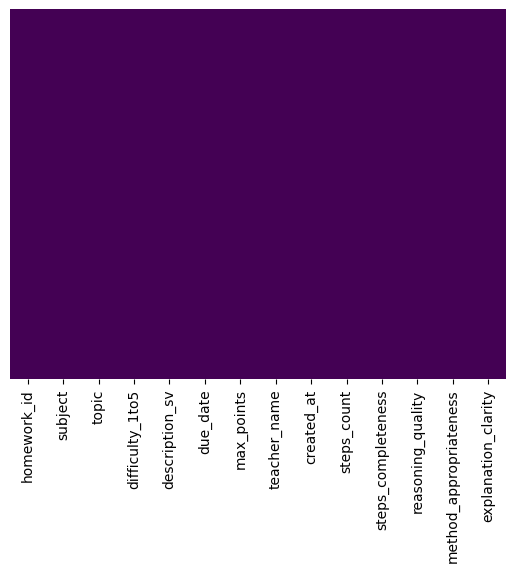

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### Exploratory Data Analysis

In [6]:
# Overview of data structure
data.info()

# Quick statistical summary
data.describe()

# Count unique topics (ämnen)
data['topic'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   homework_id             994 non-null    int64  
 1   subject                 994 non-null    object 
 2   topic                   994 non-null    object 
 3   difficulty_1to5         994 non-null    int64  
 4   description_sv          994 non-null    object 
 5   due_date                994 non-null    object 
 6   max_points              994 non-null    int64  
 7   teacher_name            994 non-null    object 
 8   created_at              994 non-null    object 
 9   steps_count             994 non-null    int64  
 10  steps_completeness      994 non-null    float64
 11  reasoning_quality       994 non-null    float64
 12  method_appropriateness  994 non-null    float64
 13  explanation_clarity     994 non-null    float64
dtypes: float64(4), int64(4), object(6)
memory 

topic
Algebra                    142
Geometri                   142
Ekvationer                 142
Funktioner                 142
Procent                    142
Problemlösning             142
Statistik & Sannolikhet    142
Name: count, dtype: int64

In [7]:
print(data["difficulty_1to5"].value_counts().sort_index())

difficulty_1to5
1    198
2    200
3    203
4    198
5    195
Name: count, dtype: int64


### Analyze and Visualize the Dataset

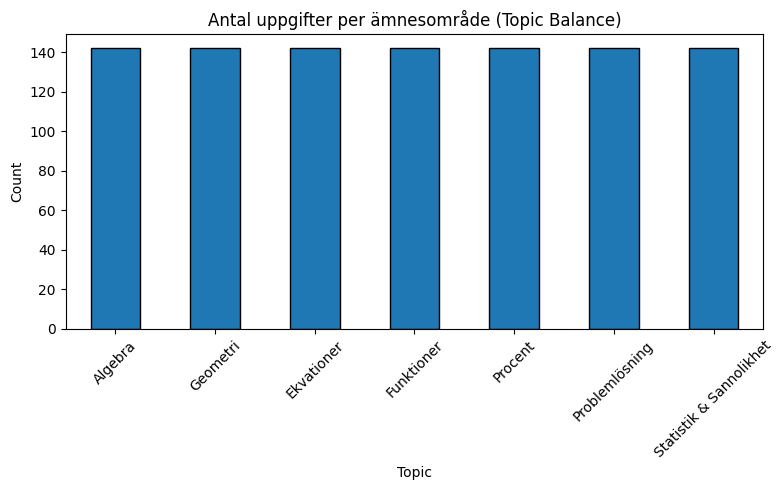

✅ Topic balance:
 topic
Algebra                    142
Geometri                   142
Ekvationer                 142
Funktioner                 142
Procent                    142
Problemlösning             142
Statistik & Sannolikhet    142
Name: count, dtype: int64 



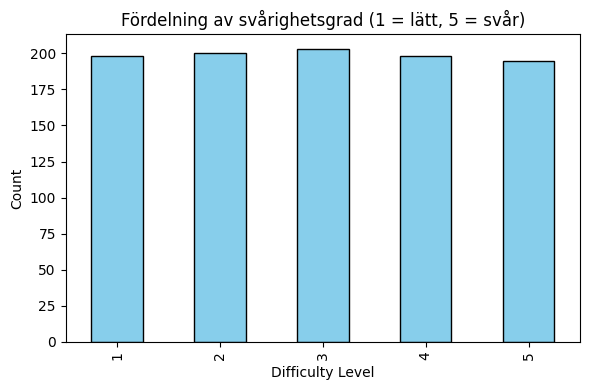

✅ Difficulty distribution:
 difficulty_1to5
1    198
2    200
3    203
4    198
5    195
Name: count, dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt



# --- 1️⃣ Topic balance ---
topic_counts = data["topic"].value_counts()

plt.figure(figsize=(8, 5))
topic_counts.plot(kind="bar", edgecolor="black")
plt.title("Antal uppgifter per ämnesområde (Topic Balance)")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("✅ Topic balance:\n", topic_counts, "\n")

# --- 2️⃣ Difficulty distribution ---
plt.figure(figsize=(6, 4))
data["difficulty_1to5"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Fördelning av svårighetsgrad (1 = lätt, 5 = svår)")
plt.xlabel("Difficulty Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("✅ Difficulty distribution:\n", data["difficulty_1to5"].value_counts().sort_index())


### Full Analysis Script (3 Charts)

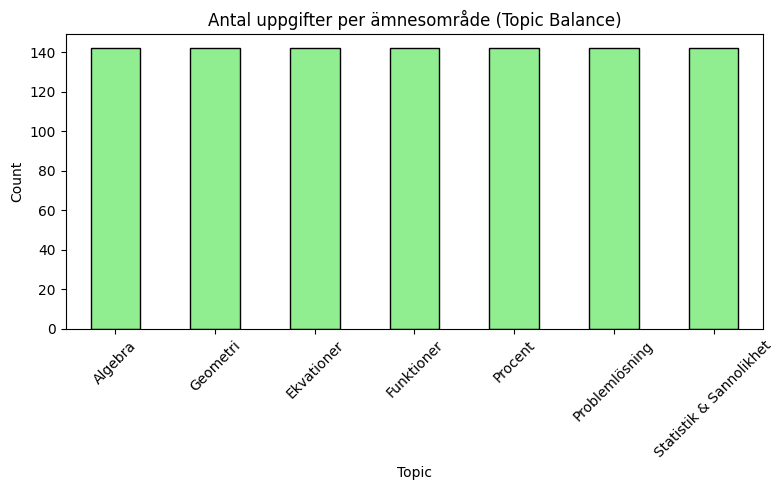

✅ Topic balance:
 topic
Algebra                    142
Geometri                   142
Ekvationer                 142
Funktioner                 142
Procent                    142
Problemlösning             142
Statistik & Sannolikhet    142
Name: count, dtype: int64 



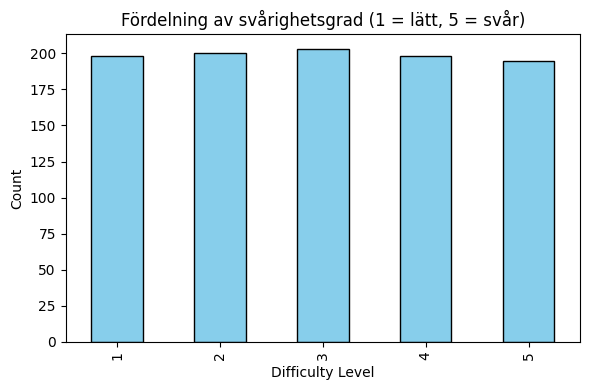

✅ Difficulty distribution:
 difficulty_1to5
1    198
2    200
3    203
4    198
5    195
Name: count, dtype: int64 



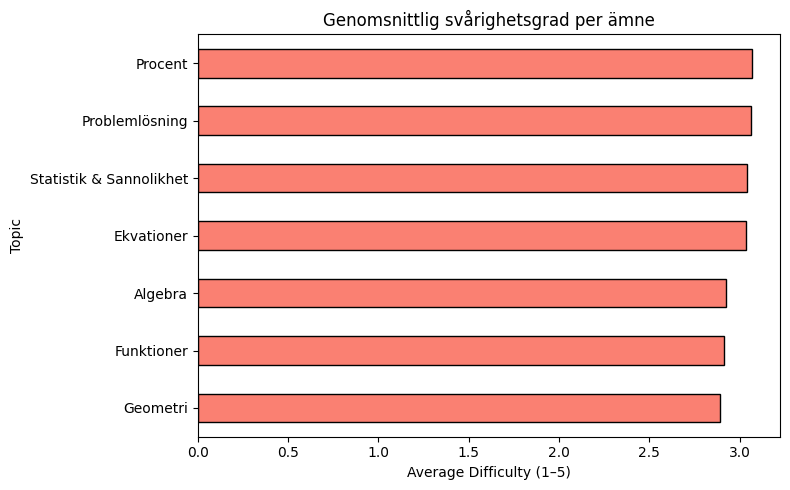

✅ Average difficulty per topic:
 topic
Geometri                   2.894366
Funktioner                 2.915493
Algebra                    2.922535
Ekvationer                 3.035211
Statistik & Sannolikhet    3.042254
Problemlösning             3.063380
Procent                    3.070423
Name: difficulty_1to5, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# --- 1️⃣ Topic balance ---
topic_counts = data["topic"].value_counts()

plt.figure(figsize=(8, 5))
topic_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Antal uppgifter per ämnesområde (Topic Balance)")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("✅ Topic balance:\n", topic_counts, "\n")

# --- 2️⃣ Difficulty distribution ---
plt.figure(figsize=(6, 4))
data["difficulty_1to5"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Fördelning av svårighetsgrad (1 = lätt, 5 = svår)")
plt.xlabel("Difficulty Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("✅ Difficulty distribution:\n", data["difficulty_1to5"].value_counts().sort_index(), "\n")

# --- 3️⃣ Average difficulty per topic ---
avg_difficulty = data.groupby("topic")["difficulty_1to5"].mean().sort_values()

plt.figure(figsize=(8, 5))
avg_difficulty.plot(kind="barh", color="salmon", edgecolor="black")
plt.title("Genomsnittlig svårighetsgrad per ämne")
plt.xlabel("Average Difficulty (1–5)")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

print("✅ Average difficulty per topic:\n", avg_difficulty)


### Import Libraries and Load Data

In [11]:
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Abo
[nltk_data]     Mahmoud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Data loaded successfully!
(994, 14)
   homework_id    subject    topic  difficulty_1to5  \
0            1  Matematik  Algebra                4   
1            2  Matematik  Algebra                2   
2            3  Matematik  Algebra                2   
3            4  Matematik  Algebra                2   
4            5  Matematik  Algebra                1   

                                      description_sv    due_date  max_points  \
0  Beräkna värdet av uttrycket 3x² + 2x − 5 när x...  2025-10-12           6   
1  Beräkna värdet av uttrycket 3x² + 2x − 5 när x...  2025-10-09           5   
2  Beräkna värdet av uttrycket 3x² + 2x − 5 när x...  2025-11-22           7   
3  Lös ekvationen 4(x − 2) = 8 och förklara varje...  2025-11-23           8   
4  Beräkna värdet av uttrycket 3x² + 2x − 5 när x...  2025-09-21          13   

      teacher_name  created_at  steps_count  steps_completeness  \
0    Mats Svensson  2025-09-29           12               0.978   
1       Maria Ho

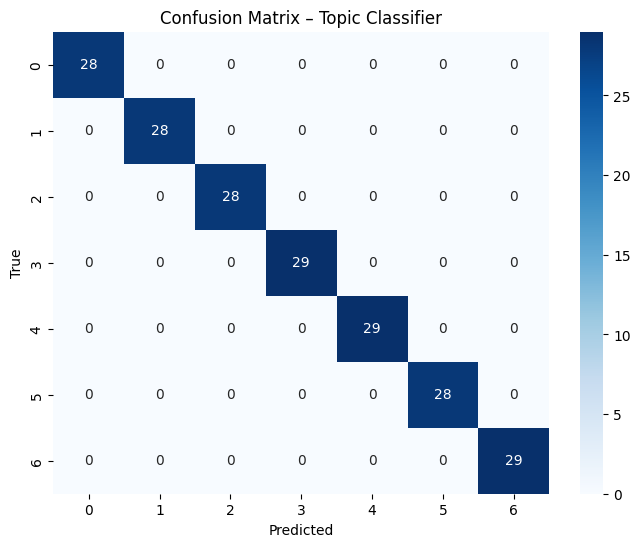


📊 Classification Report (Difficulty 1–5):
              precision    recall  f1-score   support

           1       0.28      0.11      0.15        47
           2       0.25      0.25      0.25        40
           3       0.17      0.48      0.26        29
           4       0.24      0.17      0.20        42
           5       0.12      0.10      0.11        41

    accuracy                           0.20       199
   macro avg       0.21      0.22      0.19       199
weighted avg       0.22      0.20      0.19       199


🧠 Example Prediction:
Predicted topic: Geometri
Predicted difficulty: 3


In [12]:
# --- 1. Import libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Download Swedish stopwords
nltk.download('stopwords')
swedish_stopwords = stopwords.words('swedish')
# --- 2. Load dataset ---
train_data = pd.read_csv("../data/homework_dataset.csv", encoding="utf-8-sig")
print("✅ Data loaded successfully!")
print(train_data.shape)
print(train_data.head())

# --- 3. Check missing values ---
print("\nMissing values per column:")
print(train_data.isnull().sum())

# Keep only the text and labels we need
data = train_data[["description_sv", "topic", "difficulty_1to5"]].dropna()

# --- 4. Split for topic classification ---
X_train, X_test, y_train, y_test = train_test_split(
    data["description_sv"],
    data["topic"],
    test_size=0.2,
    random_state=42,
    stratify=data["topic"]
)

# --- 5. TF-IDF vectorization ---
vectorizer = TfidfVectorizer(max_features=3000, stop_words=swedish_stopwords)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 6. Train topic classifier ---
model_topic = LogisticRegression(max_iter=1000)
model_topic.fit(X_train_tfidf, y_train)
y_pred_topic = model_topic.predict(X_test_tfidf)

# --- 7. Evaluate topic model ---
print("\n📊 Classification Report (Topic):")
print(classification_report(y_test, y_pred_topic))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_topic), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Topic Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- 8. Train difficulty predictor ---
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    data["description_sv"],
    data["difficulty_1to5"],
    test_size=0.2,
    random_state=42
)

X_train_d_tfidf = vectorizer.fit_transform(X_train_d)
X_test_d_tfidf = vectorizer.transform(X_test_d)

model_difficulty = LogisticRegression(max_iter=1000)
model_difficulty.fit(X_train_d_tfidf, y_train_d)
y_pred_difficulty = model_difficulty.predict(X_test_d_tfidf)

print("\n📊 Classification Report (Difficulty 1–5):")
print(classification_report(y_test_d, y_pred_difficulty))

# --- 9. Test a sample ---
example = ["En cylinder har radie 4 cm och höjd 10 cm. Beräkna volymen."]
X_example = vectorizer.transform(example)

print("\n🧠 Example Prediction:")
print("Predicted topic:", model_topic.predict(X_example)[0])
print("Predicted difficulty:", model_difficulty.predict(X_example)[0])

# How to Improve Difficulty Prediction

### Add more features beyond text

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import nltk

# Load dataset
data = pd.read_csv("../data/homework_dataset.csv")

# Download Swedish stopwords
nltk.download('stopwords')
swedish_stopwords = stopwords.words('swedish')

# Combine topic description text
X_text = data["description_sv"].astype(str)
y_topic = data["topic"]
y_diff = data["difficulty_1to5"]

# Split train/test
X_train, X_test, y_train_t, y_test_t = train_test_split(X_text, y_topic, test_size=0.2, random_state=42)
_, _, y_train_d, y_test_d = train_test_split(X_text, y_diff, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=3000, stop_words=swedish_stopwords)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ⚙️ Add numeric metadata (e.g., max_points)
X_train_meta = data.loc[X_train.index, ["max_points"]].reset_index(drop=True)
X_test_meta = data.loc[X_test.index, ["max_points"]].reset_index(drop=True)

# Combine TF-IDF + numeric features
import numpy as np
X_train_combined = np.hstack([X_train_tfidf.toarray(), X_train_meta.values])
X_test_combined = np.hstack([X_test_tfidf.toarray(), X_test_meta.values])

# --- Train topic model ---
model_topic = LogisticRegression(max_iter=1000)
model_topic.fit(X_train_tfidf, y_train_t)
y_pred_topic = model_topic.predict(X_test_tfidf)
print("\n📘 Classification Report – Topic:")
print(classification_report(y_test_t, y_pred_topic))

# --- Train difficulty model ---
model_diff = LogisticRegression(max_iter=1000)
model_diff.fit(X_train_combined, y_train_d)
y_pred_diff = model_diff.predict(X_test_combined)
print("\n📘 Classification Report – Difficulty:")
print(classification_report(y_test_d, y_pred_diff))


📘 Classification Report – Topic:
                         precision    recall  f1-score   support

                Algebra       1.00      1.00      1.00        28
             Ekvationer       1.00      1.00      1.00        32
             Funktioner       1.00      1.00      1.00        30
               Geometri       1.00      1.00      1.00        25
         Problemlösning       1.00      1.00      1.00        22
                Procent       1.00      1.00      1.00        31
Statistik & Sannolikhet       1.00      1.00      1.00        31

               accuracy                           1.00       199
              macro avg       1.00      1.00      1.00       199
           weighted avg       1.00      1.00      1.00       199


📘 Classification Report – Difficulty:
              precision    recall  f1-score   support

           1       0.24      0.13      0.17        47
           2       0.26      0.28      0.27        40
           3       0.15      0.34      0.21   

[nltk_data] Downloading package stopwords to C:\Users\Abo
[nltk_data]     Mahmoud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
numeric_features = ["max_points", "steps_count", "steps_completeness",
                    "reasoning_quality", "method_appropriateness", "explanation_clarity"]

X_train_meta = data.loc[X_train.index, numeric_features].reset_index(drop=True)
X_test_meta = data.loc[X_test.index, numeric_features].reset_index(drop=True)


In [43]:
X_train_combined = np.hstack([X_train_tfidf.toarray(), X_train_meta.values])
X_test_combined = np.hstack([X_test_tfidf.toarray(), X_test_meta.values])


### Use a Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

model_diff = RandomForestClassifier(n_estimators=300, random_state=42)
model_diff.fit(X_train_combined, y_train_d)
y_pred_diff = model_diff.predict(X_test_combined)
print(classification_report(y_test_d, y_pred_diff))


              precision    recall  f1-score   support

           1       0.49      0.43      0.45        47
           2       0.41      0.47      0.44        40
           3       0.46      0.72      0.56        29
           4       0.58      0.50      0.54        42
           5       0.50      0.37      0.42        41

    accuracy                           0.48       199
   macro avg       0.49      0.50      0.48       199
weighted avg       0.49      0.48      0.48       199



### Apply Oversampling

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_combined, y_train_d)

### Use Swedish Sentence Embeddings

In [46]:
from sentence_transformers import SentenceTransformer

# ✅ Try alternative Swedish model (very similar performance)
try:
    embedder = SentenceTransformer("AI-Sweden-Models/sbert-swedish-large")
except Exception as e:
    print("⚠️ Fallback: using multilingual model instead")
    embedder = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# Encode text fields
X_train_emb = embedder.encode(X_train.tolist(), show_progress_bar=True)
X_test_emb = embedder.encode(X_test.tolist(), show_progress_bar=True)



No sentence-transformers model found with name AI-Sweden-Models/sbert-swedish-large. Creating a new one with mean pooling.


⚠️ Fallback: using multilingual model instead


Batches:   0%|          | 0/25 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

### Save Your Models

In [47]:
import os
import joblib

# Define proper folder path
save_dir = "../training_model"
os.makedirs(save_dir, exist_ok=True)  # ✅ Create folder if it doesn't exist

# Save your models
joblib.dump(vectorizer, os.path.join(save_dir, "tfidf_vectorizer.pkl"))
joblib.dump(model_topic, os.path.join(save_dir, "topic_model.pkl"))
joblib.dump(model_diff, os.path.join(save_dir, "difficulty_model.pkl"))

print("✅ Models saved successfully to:", save_dir)

✅ Models saved successfully to: ../training_model


In [48]:
data.isnull().sum()

homework_id               0
subject                   0
topic                     0
difficulty_1to5           0
description_sv            0
due_date                  0
max_points                0
teacher_name              0
created_at                0
steps_count               0
steps_completeness        0
reasoning_quality         0
method_appropriateness    0
explanation_clarity       0
dtype: int64

In [49]:
# --- Step 1: Fill NaN values safely ---
numeric_cols = [
    "max_points", "steps_count", "steps_completeness",
    "reasoning_quality", "method_appropriateness", "explanation_clarity"
]

# Fill numeric columns with column means
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill simple text fields with defaults
data["teacher_name"] = data["teacher_name"].fillna("Okänd lärare")
data["subject"] = data["subject"].fillna("Matematik")
data["due_date"] = data["due_date"].fillna("2025-12-31")
data["created_at"] = data["created_at"].fillna("2025-10-18")

# For safety, fill steps_count if still NaN after mean
data["steps_count"] = data["steps_count"].fillna(3)

print("✅ All NaN values have been replaced safely!")

✅ All NaN values have been replaced safely!


In [ ]:
# --- 1. Import libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib
from nltk.corpus import stopwords
import nltk

# --- 2. Load and prepare data ---
data = pd.read_csv("../data/homework_dataset_augmented.csv", encoding="utf-8-sig")
nltk.download('stopwords')
swedish_stopwords = stopwords.words('swedish')

X_text = data["description_sv"].astype(str)
y_topic = data["topic"]
y_diff = data["difficulty_1to5"]

# Include numeric features
X_meta = data[["max_points", "steps_count", "steps_completeness", "reasoning_quality", 
               "method_appropriateness", "explanation_clarity"]].values

# --- 3. Vectorize text ---
vectorizer = TfidfVectorizer(max_features=3000, stop_words=swedish_stopwords)
X_tfidf = vectorizer.fit_transform(X_text)

# Combine text + numeric
X_combined = np.hstack([X_tfidf.toarray(), X_meta])

# --- 4. Train/test split ---
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tfidf, y_topic, test_size=0.2, random_state=42)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_combined, y_diff, test_size=0.2, random_state=42)

# --- 5. Train models ---
model_topic = LogisticRegression(max_iter=1000)
model_diff = LogisticRegression(max_iter=1000, class_weight="balanced")

model_topic.fit(X_train_t, y_train_t)
model_diff.fit(X_train_d, y_train_d)

# --- 6. Evaluate ---
print("\n📘 Topic Model Report:")
print(classification_report(y_test_t, model_topic.predict(X_test_t)))

print("\n📘 Difficulty Model Report:")
print(classification_report(y_test_d, model_diff.predict(X_test_d)))

# --- 7. Save models ---
joblib.dump(vectorizer, "../training_model/tfidf_vectorizer.pkl")
joblib.dump(model_topic, "../training_model/topic_model.pkl")
joblib.dump(model_diff, "../training_model/difficulty_model.pkl")

print("\n✅ Models retrained and saved successfully!")


[nltk_data] Downloading package stopwords to C:\Users\Abo
[nltk_data]     Mahmoud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

: 